In [29]:
import pandas as pd

df = pd.read_csv('../datasets/spam_email.csv')

df.head()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32.0,3,3.0,0,11,1.0,1.0
1,3,9,45,1.0,2,1.0,2,8,2.0,1.0
2,3,9,52,1.0,4,0.0,2,10,1.0,1.0
3,2,3,75,6.0,0,2.0,0,8,2.0,0.0
4,3,5,299,279.0,0,2.0,0,6,1.0,1.0


In [30]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows.index)
df_cleaned = df.dropna()
df_cleaned.shape

Index([52, 91, 130, 136], dtype='int64')


(5996, 10)

In [31]:
X = df_cleaned.iloc[:, :-1].values
y= df_cleaned.iloc[:, -1].values

print(X.shape)
print(y.shape)

(5996, 9)
(5996,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(4796, 9)
(4796,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [40]:
pred = model.predict(X_test_scaled)

print(pred[34])
print(y_test[34])

1.0
1.0


## Manual Calculation

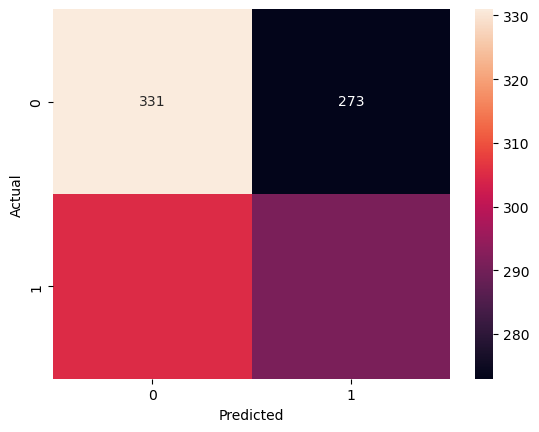

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
total = y_test.shape[0]
print("Total:",total)

True Positives: 291
True Negatives: 331
False Positives: 273
False Negatives: 305
Total: 1200


In [43]:
import math

acc = (TP+TN)/total
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)
mcc = ((TP*TN)-(FP*FN))/math.sqrt((TP+FN)*(TP+FN)*(TN+FP)*(TN+FN))
spec = TN/(FP+TN)
npv = TN/(TN+FN)

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC Score:", mcc)
print("Specificity:", spec)
print("Negative Predictive Rate", npv)

Accuracy: 0.5183333333333333
Precision: 0.5159574468085106
Recall: 0.48825503355704697
F1 Score: 0.5017241379310344
MCC Score: 0.03534409407897688
Specificity: 0.5480132450331126
Negative Predictive Rate 0.5204402515723271


## sklearn values

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC Score:", matthews_corrcoef(y_test, pred))

Accuracy: 0.5183333333333333
Precision: 0.5159574468085106
Recall: 0.48825503355704697
F1 Score: 0.5017241379310344
MCC Score: 0.03633293086054056


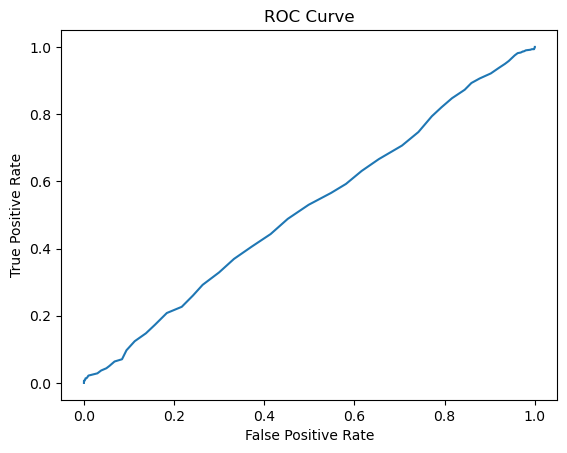

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()